In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

idx = np.arange(100)
np.random.shuffle(idx)

In [ ]:
train_idx = idx[:80]
val_idx = idx[80:]

In [ ]:
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [ ]:
plt.plot(x_train, y_train, 'o')

In [ ]:
plt.plot(x_val, y_val, 'o')

# Model

In [ ]:
a = np.random.randn(1)
b = np.random.randn(1)
print(a, b)
yp = a + b * x_train

[1.5883935] [-0.16623771]


# Loss

In [ ]:
error = (yp - y_train)
loss = (error ** 2).mean()
loss

0.5323423090116217

In [ ]:
a_grad = -2 * error.mean()
b_grad = -2 * (x_train * error).mean()
print(a_grad, b_grad)

0.8454856634375295 0.7133907178322277


# Update

In [ ]:
lr = 0.1

In [ ]:
a = a - lr * a_grad
b = b - lr * b_grad
print(a, b)

[-0.38652447] [-0.21157466]


# Main

In [ ]:
np.random.seed(2)
a = np.random.randn(1)
b = np.random.randn(1)
print(a, b)

lr = 0.001
n_epochs = 100000

for epoch in range(n_epochs):
  # Model
  yp = a + b * x_train

  error = (y_train - yp)
  loss = (error ** 2).mean()

  a_grad = -2 * error.mean()
  b_grad = -2 * (x_train * error).mean()

  a = a - lr * a_grad
  b = b - lr * b_grad
  print(loss)

print(a, b)

# Plot

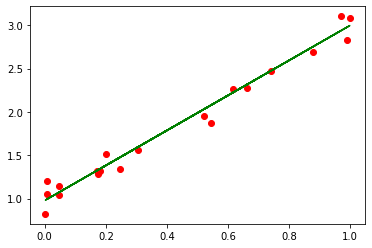

In [ ]:
plt.plot(x_val, y_val, 'ro')

yhat = a + b * x_val
plt.plot(x_val, yhat, 'g')

# Torch 1

In [ ]:
import torch

In [ ]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [ ]:
# np.random.seed(2)
# a = np.random.randn(1)
# b = np.random.randn(1)

torch.manual_seed(10)
a = torch.randn(1)
b = torch.randn(1)

print(a, b)

lr = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
  # Model
  yp = a + b * x_train

  error = (y_train - yp)
  loss = (error ** 2).mean()

  a_grad = -2 * error.mean()
  b_grad = -2 * (x_train * error).mean()

  a = a - lr * a_grad
  b = b - lr * b_grad
  print(loss)

print(a, b)

In [ ]:
x_val = torch.from_numpy(x_val)
y_val = torch.from_numpy(y_val)

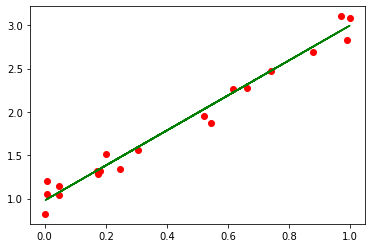

In [ ]:
plt.plot(x_val, y_val, 'ro')

yhat = a + b * x_val
plt.plot(x_val.numpy(), yhat.numpy(), 'g')

In [ ]:
loss.backward()

In [ ]:
x = torch.randn(1, requires_grad=True)
# a = torch.randn(1)
print(x)

# dy/dx = 2 * x
y = x ** 2

y.backward()
print(x.grad)

tensor([0.9198], requires_grad=True)
tensor([2.5383])


In [ ]:
x_train = x_train.float()
y_train = y_train.float()

In [ ]:
# np.random.seed(2)
# a = np.random.randn(1)
# b = np.random.randn(1)

# torch.manual_seed(10)
# a = torch.randn(1, requires_grad=True)
# b = torch.randn(1, requires_grad=True)

# print(a, b)

model = torch.nn.Sequential(torch.nn.Linear(1, 1))
model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

loss = torch.nn.MSELoss()

# lr = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
  # Model
  # yp = a + b * x_train
  yp = model(x_train)

  l = loss(yp, y_train)
  # error = (y_train - yp)
  # loss = (error ** 2).mean()
  l.backward()

  # a_grad = -2 * error.mean()
  # b_grad = -2 * (x_train * error).mean()

  # a = a - lr * a.grad
  # b = b - lr * b.grad
  optimizer.step()
  optimizer.zero_grad()

  print(l.item())

print(model.state_dict())

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# np.random.seed(2)
# a = np.random.randn(1)
# b = np.random.randn(1)

# torch.manual_seed(10)
# a = torch.randn(1, requires_grad=True)
# b = torch.randn(1, requires_grad=True)

# print(a, b)

model = torch.nn.Sequential(torch.nn.Linear(1, 1))
class LinearReg(torch.nn.Module):
  def __init__(self):
    super().__init__()
    #
    self.neuron = torch.nn.Linear(1, 1)
    self.neuron2 = torch.nn.Linear(1, 1)
    self.relu = torch.nn.Relu()

  def forward(self, x):
    y = F.relu(self.neuron(x))
    z = self.neuron2(y)
    p = y + z
    return p, y, z

model = LinearReg()
model.cpu()
model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

loss = torch.nn.MSELoss()

# lr = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
  # Model
  # yp = a + b * x_train
  yp, yp2, yp3 = model(x_train)

  l = loss(yp, y_train)
  l2 = loss2(yp2, y_train)
  l3 = loss3(yp3, y_train)
  L = l + l2 + l3
  # error = (y_train - yp)
  # loss = (error ** 2).mean()
  l.backward()

  # a_grad = -2 * error.mean()
  # b_grad = -2 * (x_train * error).mean()

  # a = a - lr * a.grad
  # b = b - lr * b.grad
  optimizer.step()
  optimizer.zero_grad()

  print(l.item())

print(model.state_dict())

2.8386311531066895
1.6388925313949585
0.9586746096611023
0.5727599263191223
0.35357025265693665
0.2288375198841095
0.1576242446899414
0.11674060672521591
0.0930500254034996
0.07911098003387451
0.0707077905535698
0.0654522031545639
0.061990998685359955
0.059557460248470306
0.05771694704890251
0.056223064661026
0.054935913532972336
0.053776077926158905
0.0526982918381691
0.051676712930202484
0.050696443766355515
0.049748849123716354
0.0488288477063179
0.047933291643857956
0.04706024378538132
0.046208396553993225
0.04537680000066757
0.044564731419086456
0.043771617114543915
0.04299690201878548
0.04224015399813652
0.04150090366601944
0.040778737515211105
0.040073249489068985
0.03938406705856323
0.038710806518793106
0.038053080439567566
0.03741054609417915
0.03678283840417862
0.036169640719890594
0.03557058423757553
0.03498537093400955
0.03441367298364639
0.03385516628623009
0.03330954536795616
0.03277655690908432
0.03225585073232651
0.03174716979265213
0.031250230967998505
0.03076476417481

In [ ]:
neuron = torch.nn.Linear(1, 1)

In [ ]:
import torch.nn.functional as F

from .unet_parts import *


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits